## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  96.487224   617.027844  0.112582  4.952898  0.610790
1  86.979156   194.597721  0.105352  2.414513  0.354488
2   6.978417   230.281983  0.138637  4.666461  1.234297
3  81.914811  1697.317285  0.708873  5.499527  1.566961
4  39.935481   966.629751  0.050960  3.032804  0.892556


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.11076 | train_mse: 6.43834 | train_mae: 1.91538 |  0:00:00s
epoch 1  | loss: 0.66188 | train_mse: 4.44056 | train_mae: 1.68303 |  0:00:00s
epoch 2  | loss: 0.50135 | train_mse: 2.34646 | train_mae: 1.21925 |  0:00:00s


epoch 3  | loss: 0.63789 | train_mse: 1.45004 | train_mae: 0.92876 |  0:00:00s
epoch 4  | loss: 0.48745 | train_mse: 1.19074 | train_mae: 0.81364 |  0:00:00s
epoch 5  | loss: 0.63366 | train_mse: 1.55096 | train_mae: 0.85517 |  0:00:00s


epoch 6  | loss: 0.3645  | train_mse: 1.38545 | train_mae: 0.8564  |  0:00:00s
epoch 7  | loss: 0.21066 | train_mse: 1.41504 | train_mae: 0.83998 |  0:00:00s
epoch 8  | loss: 0.36923 | train_mse: 0.93461 | train_mae: 0.70532 |  0:00:00s


epoch 9  | loss: 0.24145 | train_mse: 0.56669 | train_mae: 0.56828 |  0:00:00s
epoch 10 | loss: 0.2202  | train_mse: 0.49499 | train_mae: 0.53068 |  0:00:00s
epoch 11 | loss: 0.23818 | train_mse: 0.58014 | train_mae: 0.53238 |  0:00:01s


epoch 12 | loss: 0.30336 | train_mse: 0.66028 | train_mae: 0.55492 |  0:00:01s
epoch 13 | loss: 0.49499 | train_mse: 0.68717 | train_mae: 0.57419 |  0:00:01s


epoch 14 | loss: 0.23595 | train_mse: 0.76286 | train_mae: 0.62964 |  0:00:01s
epoch 15 | loss: 0.18819 | train_mse: 0.755   | train_mae: 0.60686 |  0:00:01s


epoch 16 | loss: 0.16045 | train_mse: 0.71027 | train_mae: 0.58827 |  0:00:01s
epoch 17 | loss: 0.30449 | train_mse: 0.66832 | train_mae: 0.55934 |  0:00:01s
epoch 18 | loss: 0.27111 | train_mse: 0.71606 | train_mae: 0.60304 |  0:00:01s


epoch 19 | loss: 0.21953 | train_mse: 0.64303 | train_mae: 0.59096 |  0:00:01s
epoch 20 | loss: 0.19024 | train_mse: 0.35366 | train_mae: 0.45038 |  0:00:01s


epoch 21 | loss: 0.17819 | train_mse: 0.15179 | train_mae: 0.30183 |  0:00:02s
epoch 22 | loss: 0.16997 | train_mse: 0.14805 | train_mae: 0.29983 |  0:00:02s


epoch 23 | loss: 0.13469 | train_mse: 0.20208 | train_mae: 0.33238 |  0:00:02s
epoch 24 | loss: 0.18099 | train_mse: 0.26396 | train_mae: 0.39578 |  0:00:02s
epoch 25 | loss: 0.17721 | train_mse: 0.20374 | train_mae: 0.34444 |  0:00:02s


epoch 26 | loss: 0.2421  | train_mse: 0.13806 | train_mae: 0.27227 |  0:00:02s
epoch 27 | loss: 0.19564 | train_mse: 0.11878 | train_mae: 0.25373 |  0:00:02s


epoch 28 | loss: 0.13804 | train_mse: 0.16899 | train_mae: 0.31248 |  0:00:03s
epoch 29 | loss: 0.22409 | train_mse: 0.17269 | train_mae: 0.31578 |  0:00:03s


epoch 30 | loss: 0.18968 | train_mse: 0.1353  | train_mae: 0.27461 |  0:00:03s
epoch 31 | loss: 0.19734 | train_mse: 0.11581 | train_mae: 0.25658 |  0:00:03s


epoch 32 | loss: 0.30108 | train_mse: 0.10642 | train_mae: 0.25299 |  0:00:03s


epoch 33 | loss: 0.18543 | train_mse: 0.11507 | train_mae: 0.27101 |  0:00:03s
epoch 34 | loss: 0.15744 | train_mse: 0.11736 | train_mae: 0.27675 |  0:00:04s


epoch 35 | loss: 0.11584 | train_mse: 0.09295 | train_mae: 0.23189 |  0:00:04s
epoch 36 | loss: 0.17807 | train_mse: 0.09392 | train_mae: 0.22828 |  0:00:04s


epoch 37 | loss: 0.13469 | train_mse: 0.09588 | train_mae: 0.23411 |  0:00:04s
epoch 38 | loss: 0.10079 | train_mse: 0.09758 | train_mae: 0.23919 |  0:00:04s


epoch 39 | loss: 0.17372 | train_mse: 0.0899  | train_mae: 0.23102 |  0:00:04s
epoch 40 | loss: 0.12908 | train_mse: 0.07844 | train_mae: 0.21838 |  0:00:04s


epoch 41 | loss: 0.18589 | train_mse: 0.07883 | train_mae: 0.22147 |  0:00:05s
epoch 42 | loss: 0.19472 | train_mse: 0.07642 | train_mae: 0.2124  |  0:00:05s


epoch 43 | loss: 0.18605 | train_mse: 0.07435 | train_mae: 0.20845 |  0:00:05s
epoch 44 | loss: 0.1159  | train_mse: 0.0861  | train_mae: 0.22838 |  0:00:05s


epoch 45 | loss: 0.11307 | train_mse: 0.09068 | train_mae: 0.23364 |  0:00:05s
epoch 46 | loss: 0.27989 | train_mse: 0.10267 | train_mae: 0.25221 |  0:00:05s


epoch 47 | loss: 0.10029 | train_mse: 0.09652 | train_mae: 0.244   |  0:00:06s
epoch 48 | loss: 0.2143  | train_mse: 0.09028 | train_mae: 0.24133 |  0:00:06s


epoch 49 | loss: 0.29248 | train_mse: 0.10548 | train_mae: 0.25979 |  0:00:06s
epoch 50 | loss: 0.16546 | train_mse: 0.08362 | train_mae: 0.2389  |  0:00:06s


epoch 51 | loss: 0.18946 | train_mse: 0.11023 | train_mae: 0.25435 |  0:00:06s
epoch 52 | loss: 0.16479 | train_mse: 0.14633 | train_mae: 0.25987 |  0:00:06s
epoch 53 | loss: 0.13065 | train_mse: 0.13809 | train_mae: 0.25519 |  0:00:06s


epoch 54 | loss: 0.2375  | train_mse: 0.12135 | train_mae: 0.25873 |  0:00:06s
epoch 55 | loss: 0.11949 | train_mse: 0.11304 | train_mae: 0.26029 |  0:00:06s
epoch 56 | loss: 0.11352 | train_mse: 0.11273 | train_mae: 0.25982 |  0:00:07s


epoch 57 | loss: 0.12623 | train_mse: 0.09523 | train_mae: 0.24464 |  0:00:07s
epoch 58 | loss: 0.14523 | train_mse: 0.09226 | train_mae: 0.24551 |  0:00:07s


epoch 59 | loss: 0.16603 | train_mse: 0.10314 | train_mae: 0.25594 |  0:00:07s


epoch 60 | loss: 0.1773  | train_mse: 0.15409 | train_mae: 0.28844 |  0:00:07s
epoch 61 | loss: 0.09955 | train_mse: 0.19547 | train_mae: 0.31858 |  0:00:07s


epoch 62 | loss: 0.15786 | train_mse: 0.18375 | train_mae: 0.30836 |  0:00:08s
epoch 63 | loss: 0.10712 | train_mse: 0.10863 | train_mae: 0.26058 |  0:00:08s


epoch 64 | loss: 0.08747 | train_mse: 0.0827  | train_mae: 0.23594 |  0:00:08s
epoch 65 | loss: 0.12502 | train_mse: 0.07716 | train_mae: 0.22955 |  0:00:08s


epoch 66 | loss: 0.09372 | train_mse: 0.08099 | train_mae: 0.22701 |  0:00:08s
epoch 67 | loss: 0.10485 | train_mse: 0.07798 | train_mae: 0.22405 |  0:00:08s


epoch 68 | loss: 0.11887 | train_mse: 0.08183 | train_mae: 0.23028 |  0:00:08s
epoch 69 | loss: 0.22554 | train_mse: 0.09927 | train_mae: 0.24514 |  0:00:09s


epoch 70 | loss: 0.10535 | train_mse: 0.10304 | train_mae: 0.25076 |  0:00:09s
epoch 71 | loss: 0.18488 | train_mse: 0.09813 | train_mae: 0.24987 |  0:00:09s


epoch 72 | loss: 0.09667 | train_mse: 0.11023 | train_mae: 0.26615 |  0:00:09s


epoch 73 | loss: 0.15747 | train_mse: 0.11566 | train_mae: 0.25887 |  0:00:09s
epoch 74 | loss: 0.11743 | train_mse: 0.08019 | train_mae: 0.22112 |  0:00:09s


epoch 75 | loss: 0.10491 | train_mse: 0.06275 | train_mae: 0.19926 |  0:00:10s
epoch 76 | loss: 0.14352 | train_mse: 0.06396 | train_mae: 0.19974 |  0:00:10s


epoch 77 | loss: 0.10101 | train_mse: 0.07246 | train_mae: 0.21383 |  0:00:10s
epoch 78 | loss: 0.099   | train_mse: 0.07818 | train_mae: 0.21611 |  0:00:10s


epoch 79 | loss: 0.15051 | train_mse: 0.08886 | train_mae: 0.22437 |  0:00:10s
epoch 80 | loss: 0.09195 | train_mse: 0.10654 | train_mae: 0.23836 |  0:00:10s
epoch 81 | loss: 0.11275 | train_mse: 0.12409 | train_mae: 0.25512 |  0:00:10s


epoch 82 | loss: 0.08329 | train_mse: 0.1497  | train_mae: 0.27357 |  0:00:10s
epoch 83 | loss: 0.10727 | train_mse: 0.20815 | train_mae: 0.31768 |  0:00:11s
epoch 84 | loss: 0.16212 | train_mse: 0.20574 | train_mae: 0.31053 |  0:00:11s


epoch 85 | loss: 0.14756 | train_mse: 0.136   | train_mae: 0.2711  |  0:00:11s
epoch 86 | loss: 0.07742 | train_mse: 0.07238 | train_mae: 0.21845 |  0:00:11s


epoch 87 | loss: 0.14196 | train_mse: 0.06284 | train_mae: 0.20448 |  0:00:11s
epoch 88 | loss: 0.1628  | train_mse: 0.06575 | train_mae: 0.21287 |  0:00:11s


epoch 89 | loss: 0.13136 | train_mse: 0.06631 | train_mae: 0.2106  |  0:00:11s
epoch 90 | loss: 0.07062 | train_mse: 0.05603 | train_mae: 0.18778 |  0:00:12s


epoch 91 | loss: 0.13654 | train_mse: 0.05282 | train_mae: 0.17744 |  0:00:12s
epoch 92 | loss: 0.09711 | train_mse: 0.05649 | train_mae: 0.18609 |  0:00:12s


epoch 93 | loss: 0.08629 | train_mse: 0.05941 | train_mae: 0.19238 |  0:00:12s
epoch 94 | loss: 0.15117 | train_mse: 0.08577 | train_mae: 0.22577 |  0:00:12s


epoch 95 | loss: 0.08547 | train_mse: 0.08228 | train_mae: 0.22292 |  0:00:12s
epoch 96 | loss: 0.1286  | train_mse: 0.06092 | train_mae: 0.19019 |  0:00:13s


epoch 97 | loss: 0.19164 | train_mse: 0.06767 | train_mae: 0.19632 |  0:00:13s
epoch 98 | loss: 0.12198 | train_mse: 0.08325 | train_mae: 0.22547 |  0:00:13s


epoch 99 | loss: 0.07904 | train_mse: 0.10488 | train_mae: 0.26012 |  0:00:13s
epoch 100| loss: 0.19409 | train_mse: 0.12677 | train_mae: 0.2826  |  0:00:13s


epoch 101| loss: 0.19314 | train_mse: 0.0742  | train_mae: 0.20816 |  0:00:13s
epoch 102| loss: 0.12661 | train_mse: 0.06257 | train_mae: 0.18785 |  0:00:14s


epoch 103| loss: 0.09065 | train_mse: 0.06488 | train_mae: 0.1959  |  0:00:14s
epoch 104| loss: 0.19462 | train_mse: 0.06011 | train_mae: 0.19224 |  0:00:14s


epoch 105| loss: 0.20081 | train_mse: 0.05234 | train_mae: 0.18014 |  0:00:14s
epoch 106| loss: 0.08969 | train_mse: 0.07801 | train_mae: 0.2141  |  0:00:14s


epoch 107| loss: 0.09915 | train_mse: 0.10032 | train_mae: 0.24197 |  0:00:14s
epoch 108| loss: 0.09278 | train_mse: 0.07383 | train_mae: 0.20626 |  0:00:15s


epoch 109| loss: 0.20174 | train_mse: 0.06649 | train_mae: 0.19777 |  0:00:15s
epoch 110| loss: 0.08278 | train_mse: 0.06157 | train_mae: 0.18743 |  0:00:15s


epoch 111| loss: 0.13319 | train_mse: 0.05521 | train_mae: 0.18272 |  0:00:15s
epoch 112| loss: 0.09538 | train_mse: 0.05513 | train_mae: 0.18746 |  0:00:15s


epoch 113| loss: 0.10129 | train_mse: 0.05113 | train_mae: 0.18194 |  0:00:15s
epoch 114| loss: 0.10243 | train_mse: 0.04955 | train_mae: 0.18411 |  0:00:16s


epoch 115| loss: 0.12741 | train_mse: 0.04938 | train_mae: 0.17937 |  0:00:16s
epoch 116| loss: 0.13267 | train_mse: 0.05838 | train_mae: 0.18681 |  0:00:16s


epoch 117| loss: 0.09652 | train_mse: 0.10118 | train_mae: 0.23773 |  0:00:16s


epoch 118| loss: 0.22426 | train_mse: 0.15401 | train_mae: 0.2783  |  0:00:16s
epoch 119| loss: 0.12512 | train_mse: 0.18386 | train_mae: 0.28787 |  0:00:16s


epoch 120| loss: 0.10974 | train_mse: 0.11611 | train_mae: 0.25371 |  0:00:16s
epoch 121| loss: 0.12977 | train_mse: 0.08191 | train_mae: 0.22319 |  0:00:17s


epoch 122| loss: 0.12181 | train_mse: 0.07281 | train_mae: 0.21693 |  0:00:17s
epoch 123| loss: 0.11571 | train_mse: 0.09595 | train_mae: 0.24417 |  0:00:17s


epoch 124| loss: 0.25411 | train_mse: 0.14565 | train_mae: 0.303   |  0:00:17s
epoch 125| loss: 0.12767 | train_mse: 0.12823 | train_mae: 0.28921 |  0:00:17s
epoch 126| loss: 0.11153 | train_mse: 0.11294 | train_mae: 0.26341 |  0:00:17s


epoch 127| loss: 0.18337 | train_mse: 0.13287 | train_mae: 0.27996 |  0:00:17s
epoch 128| loss: 0.1207  | train_mse: 0.12978 | train_mae: 0.27346 |  0:00:17s


epoch 129| loss: 0.15262 | train_mse: 0.12622 | train_mae: 0.26586 |  0:00:18s
epoch 130| loss: 0.08929 | train_mse: 0.11038 | train_mae: 0.24736 |  0:00:18s


epoch 131| loss: 0.14622 | train_mse: 0.09732 | train_mae: 0.24473 |  0:00:18s
epoch 132| loss: 0.17354 | train_mse: 0.08545 | train_mae: 0.22586 |  0:00:18s


epoch 133| loss: 0.1524  | train_mse: 0.0778  | train_mae: 0.22147 |  0:00:18s
epoch 134| loss: 0.1025  | train_mse: 0.07578 | train_mae: 0.2172  |  0:00:19s


epoch 135| loss: 0.08811 | train_mse: 0.07118 | train_mae: 0.19956 |  0:00:19s
epoch 136| loss: 0.15683 | train_mse: 0.06606 | train_mae: 0.19454 |  0:00:19s


epoch 137| loss: 0.09995 | train_mse: 0.07392 | train_mae: 0.19967 |  0:00:19s
epoch 138| loss: 0.14709 | train_mse: 0.07684 | train_mae: 0.20537 |  0:00:19s


epoch 139| loss: 0.11301 | train_mse: 0.08363 | train_mae: 0.21411 |  0:00:19s
epoch 140| loss: 0.07376 | train_mse: 0.1005  | train_mae: 0.22785 |  0:00:20s


epoch 141| loss: 0.12947 | train_mse: 0.10769 | train_mae: 0.22868 |  0:00:20s

Early stopping occurred at epoch 141 with best_epoch = 91 and best_train_mae = 0.17744
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

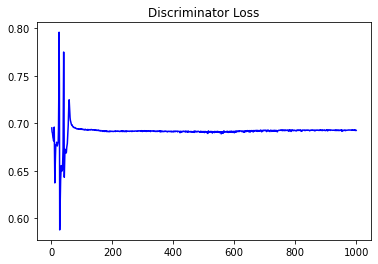

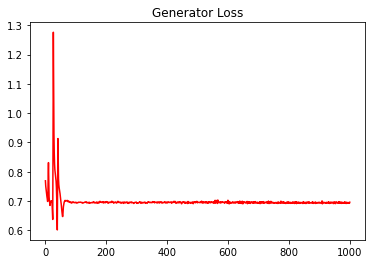

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10889397218577719


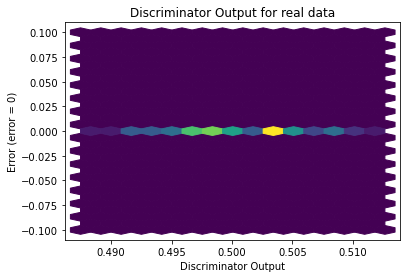

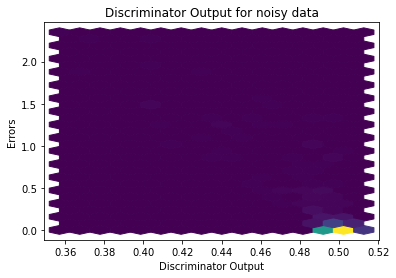

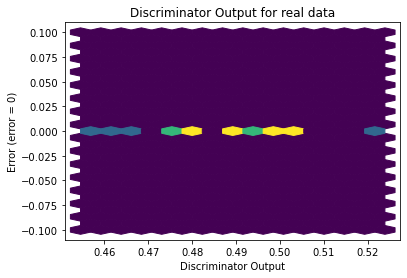

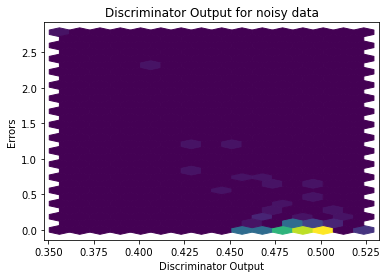

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


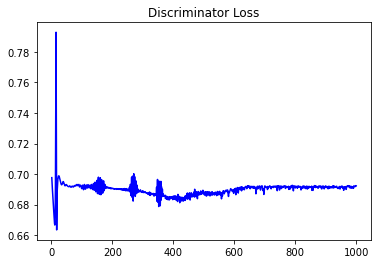

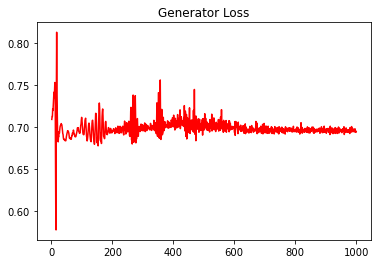

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.18688670361326398


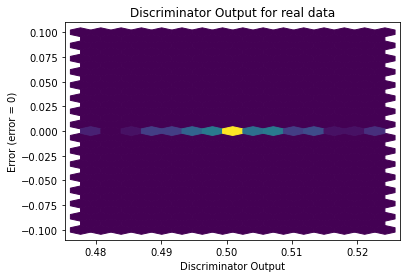

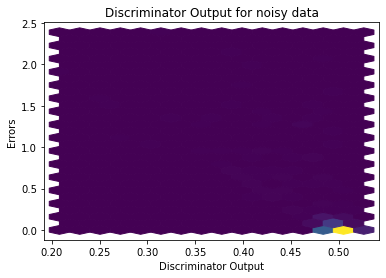

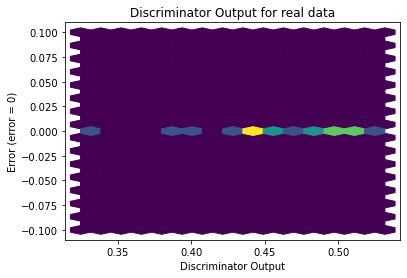

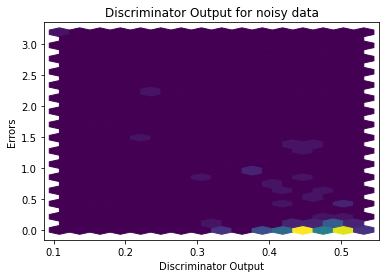

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1170]], requires_grad=True)
